<a href="https://colab.research.google.com/github/tocom242242/aifx_blog_codes/blob/master/nn_tf2/conv/cnn_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
import copy
from IPython import display

In [2]:
def plot_imgs(imgs,shuffle=False):
    plt.figure(figsize=(10,10))
    plot_imgs = copy.deepcopy(imgs)
    if shuffle:
        np.random.shuffle(plot_imgs)
    for i in range(36):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(imgs[i]), cmap="gray", vmin=0, vmax=1)
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
# (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
def resize(input_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return input_image

In [6]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# cifar10ではコメントアウトする
x_train = tf.image.resize(x_train[...,tf.newaxis], [32, 32])
x_test = tf.image.resize(x_test[...,tf.newaxis], [32, 32])

In [7]:
x_train.shape[1:]

TensorShape([32, 32, 1])

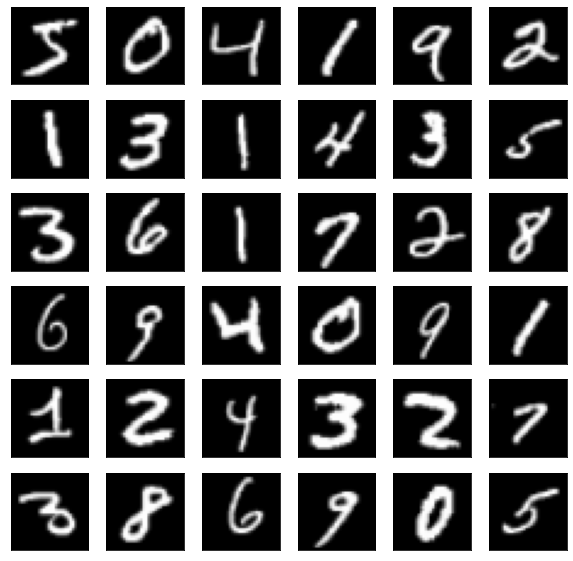

In [8]:
plot_imgs(x_train)

In [9]:
input_shape = x_train.shape[1:]
output_channel = x_train.shape[-1]

inputs = tf.keras.layers.Input(shape=input_shape)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(output_channel, (3, 3), activation='sigmoid', padding='same')(x)

model = tf.keras.Model(inputs, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [10]:
n = 10
input_num = 100
def plot_rec(input_images):
    plt.figure(figsize=(20, 4))
    decoded_imgs = model(input_images[:input_num], training=True)
    plt_index = np.random.randint(0,input_num,size=n)
    decoded_imgs = tf.squeeze(decoded_imgs)
    input_images = np.squeeze(input_images)

    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        idx = plt_index[i]
        plt.imshow(input_images[idx], cmap="gray", vmin=0, vmax=1)
        plt.title("input")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[idx], cmap="gray", vmin=0, vmax=1)
        plt.title("output")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [11]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            display.clear_output(wait=True)
            plot_rec(x_train)

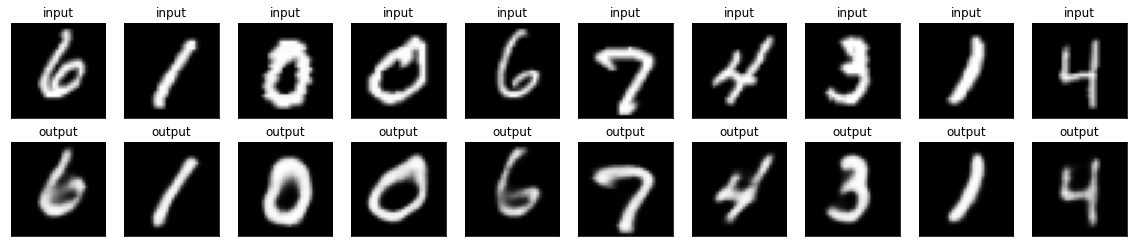

Epoch 42/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1131 - val_loss: 0.1124
Epoch 43/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1130 - val_loss: 0.1122
Epoch 44/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1129 - val_loss: 0.1120
Epoch 45/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1128 - val_loss: 0.1124
Epoch 46/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1127 - val_loss: 0.1119
Epoch 47/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1127 - val_loss: 0.1119
Epoch 48/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1126 - val_loss: 0.1117
Epoch 49/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1126 - val_loss: 0.1118
Epoch 50/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1125 - val_loss: 0.1116


In [12]:
model.fit(x_train,x_train,epochs=50, batch_size=120, shuffle=True, validation_data=(x_test,x_test),callbacks=[CustomCallback()])

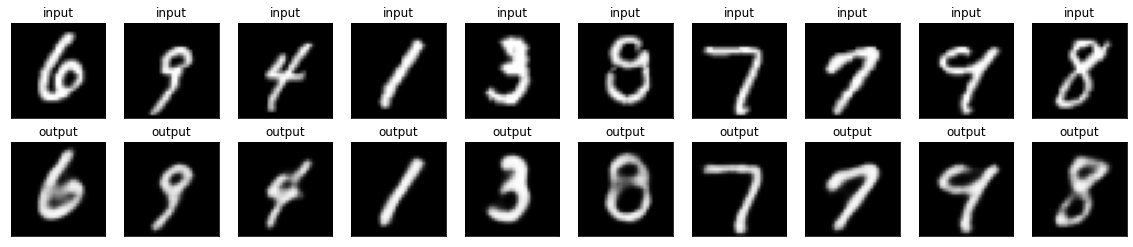

In [13]:
plot_rec(x_train)